This notebook should walk through how we'll be reading in the data and give the basics on how to get started on making plots.  The matplotlib documentation (both official and on stackexchange) is usually pretty good, but can be tricky getting started.

Note that with a jupyter notebook you can designate cells as either code or markdown text, like this one is, for more comprehensive comments.


In [149]:
import numpy as np
import pandas as pd
import scipy as sc
import uproot as up
import matplotlib.pyplot as plt
#packages we'll need

%matplotlib inline 
#this is a ``magic command'' specific to display plots in-line in a jupyter notebook
#normally you would plot by calling a plt.show()


from matplotlib.colors import LogNorm
#need this for the colourbar of the 2D histogram

In [150]:

# merge get dataframes from .root files and 
def get_data(num_towers, path):
    frames = []

    for t in range(1, num_towers + 1):
        new_path = path + str(t) + '.root'

        #load tower
        event = up.open(new_path)['tree']

        #recast the data as a pandas dataframe and append to frames
        frames.append(event.pandas.df())
    
    return pd.concat(frames)
    
    
    
my_path = './data/ds3564/ds3564Tower'

alldata = get_data(19, my_path)

#fix MaxPos

alldata['MaxPosInWindow'] = alldata['MaxPosInWindow']/1000.0

In [151]:
alldata

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp
entry,,,,,,,,,,
0,350259,4,201.712,1,3.175603,3.162,5.350868e+03,-2228.379725,2209.313868,6.922486e+03
1,350259,32,334.408,1,3.173095,3.164,5.333960e+03,-4604.478149,3705.018311,7.599031e+03
2,350259,23,1922.776,1,3.209816,3.208,4.736281e+03,-4649.411229,3223.717717,6.487084e+03
3,350259,6,3444.392,1,3.175244,3.161,5.341670e+03,-4218.544189,3944.732849,7.330490e+03
4,350259,29,5731.368,1,3.168502,3.158,5.415189e+03,-4729.856969,2827.517034,7.222236e+03
...,...,...,...,...,...,...,...,...,...,...
629575,350292,975,56754.517,0,9999.999000,3.324,9.999999e+06,-5140.619446,134.950806,9.999999e+06
629576,350292,937,56872.128,1,3.177405,3.176,5.286591e+03,-2585.631765,3640.902913,6.996134e+03
629577,350292,975,57397.425,0,9999.999000,7.712,9.999999e+06,-5143.951182,118.415599,9.999999e+06


This displays the dataframe with all of our variables and events.

In [187]:
from datetime import datetime, timezone


def get_runstarttimes():

    times = {}
    
    # fix times
    with open("./data/ds3564_start_stop_times.txt") as f:
        f.readline()
        f.readline()

        first = True

        for line in f:
            linedata = line.split('|')
            linedata = [i.lstrip().rstrip() for i in linedata]

            if linedata[2] == "Background" and linedata[6] == "OK (0)":

                linedate = datetime.strptime(linedata[3], "%b %d, %Y %H:%M:%S%z")
                #print(linedate.timestamp())
                timestamp = linedate.replace(tzinfo=timezone.utc).timestamp()

                # save first run timestamp
                if first:
                    first_timestamp = timestamp
                    first = False

                times[int(linedata[1])] = timestamp - first_timestamp
    return times

run_starttimes = get_runstarttimes()
    
print(run_starttimes)

{350259: 0.0, 350260: 54433.0, 350261: 122059.0, 350262: 200548.0, 350263: 277383.0, 350264: 368555.0, 350265: 456665.0, 350266: 537205.0, 350267: 621311.0, 350268: 714202.0, 350269: 797467.0, 350270: 885007.0, 350271: 980616.0, 350272: 1062136.0, 350273: 1147164.0, 350274: 1231147.0, 350275: 1317642.0, 350276: 1403999.0, 350277: 1488425.0, 350278: 1580622.0, 350279: 1663750.0, 350280: 1747607.0, 350281: 1839441.0, 350282: 1920913.0, 350283: 2007748.0, 350284: 2101039.0, 350285: 2180937.0, 350286: 2267440.0, 350287: 2353865.0, 350288: 2440263.0, 350289: 2528041.0, 350290: 2613768.0, 350291: 2627800.0, 350292: 2700781.0}


In [153]:
alldata[alldata['Run'] == 350259]

for run in alldata['Run'].unique():
    
    alldata.loc[alldata['Run'] == run, ['Time']] += run_starttimes[run]

alldata

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp
entry,,,,,,,,,,
0,350259,4,201.712,1,3.175603,3.162,5.350868e+03,-2228.379725,2209.313868,6.922486e+03
1,350259,32,334.408,1,3.173095,3.164,5.333960e+03,-4604.478149,3705.018311,7.599031e+03
2,350259,23,1922.776,1,3.209816,3.208,4.736281e+03,-4649.411229,3223.717717,6.487084e+03
3,350259,6,3444.392,1,3.175244,3.161,5.341670e+03,-4218.544189,3944.732849,7.330490e+03
4,350259,29,5731.368,1,3.168502,3.158,5.415189e+03,-4729.856969,2827.517034,7.222236e+03
...,...,...,...,...,...,...,...,...,...,...
629575,350292,975,2757535.517,0,9999.999000,3.324,9.999999e+06,-5140.619446,134.950806,9.999999e+06
629576,350292,937,2757653.128,1,3.177405,3.176,5.286591e+03,-2585.631765,3640.902913,6.996134e+03
629577,350292,975,2758178.425,0,9999.999000,7.712,9.999999e+06,-5143.951182,118.415599,9.999999e+06


In [154]:
#or more useful, to just access the array corresponding to one set of values:
alldata['Run'].values

array([350259, 350259, 350259, ..., 350292, 350292, 350292], dtype=uint32)

In [155]:
# returns array of event frequencies where channel - 1 is the index
def get_numchannelevents():
    # get num events per channel
    events = []
    for c in range(1,max(alldata['Channel']) + 1):
        events.append(len(alldata[alldata['Channel'] == c]))
    return events

events_per_channel = get_numchannelevents()

#print(events_per_channel)
#print(sum(events_per_channel)/ len(events_per_channel))

In [156]:
# find dead channels
def get_deadchannels(channel_events):
    ch = []
    for c in range(1,max(alldata['Channel']) + 1):     
        if channel_events[c - 1] == 0:
            ch.append(c)
    
    #for c in range()
    return ch

dead_channels = get_deadchannels(events_per_channel)

print("Dead channels are: " + str(dead_channels))

#alldata[alldata['Channel'] == 988]


Dead channels are: [117, 169, 792, 923]


In [157]:
from scipy import stats

#detect outliers using above threshold z-score
def get_noisychannels(channel_events):
    
    #detect outliers using z-score
    #threshold = 3.5
    #z_dist = np.abs(stats.zscore(channel_events))
    #return np.where(z_dist > threshold)
    
    #detect outliers using IQR
    threshold = 5
    Q1, Q3 = np.percentile(channel_events, 25), np.percentile(channel_events, 75)
    IQR = Q3 - Q1
    
    upper_bound = Q3 + IQR * threshold
    
    #print(channel_events[channel_events > upper_bound])
    
    return [c for c in range(1,max(alldata['Channel']) + 1) if channel_events[c - 1] > upper_bound]
    
    #return np.where(channel_events > upper_bound) 
    


    
noisy_channels = get_noisychannels(events_per_channel)

print("# of noisy channels: " + str(len(noisy_channels)) + "\n")

print("Noisy channels are: " + str(noisy_channels) + "\n")

print("Num of events per channel are: " + str([events_per_channel[i - 1] for i in noisy_channels]))


# of noisy channels: 17

Noisy channels are: [87, 361, 363, 364, 557, 558, 559, 570, 611, 713, 714, 715, 936, 973, 974, 975, 988]

Num of events per channel are: [70344, 333, 520, 539, 343, 415, 692, 317, 413, 620, 581, 3154, 483, 881, 926, 622849, 1405]


In [158]:
# get Dataframe which doesn't include noisy channels
not_noisydata = alldata[np.isin(alldata['Channel'],noisy_channels, invert=True)]

# get events above certain baseline + maxtobaseline from not_noisydata
louddata = not_noisydata[(not_noisydata['Baseline'] + not_noisydata['MaxToBaseline']) > 9000]

louddata

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp
entry,,,,,,,,,,
6,350259,27,7191.136,1,3.175879,3.637,23567.885857,-4515.251541,14154.884720,29155.087318
7,350259,28,7191.152,1,3.200379,3.687,25765.831235,-5549.806880,15168.531703,29658.848249
98,350260,2,73672.648,1,3.165242,3.517,31308.324329,-1669.523214,11263.895009,39683.776708
99,350260,1,73672.656,1,3.164472,3.604,26767.777221,-2197.285110,11831.150467,31858.203222
100,350260,17,73672.664,1,3.359793,3.754,31408.606063,-3511.258682,13117.887100,153361.492091
...,...,...,...,...,...,...,...,...,...,...
625959,350290,946,2620035.936,1,3.146274,3.127,33340.302933,-3856.221700,13447.789693,39082.955824
625964,350290,947,2620035.984,1,3.242658,3.206,26844.811556,-3487.122375,13077.729065,33053.434909
629270,350292,986,2724523.688,1,3.145783,3.462,36193.349092,-3413.161270,13032.366745,45656.897875


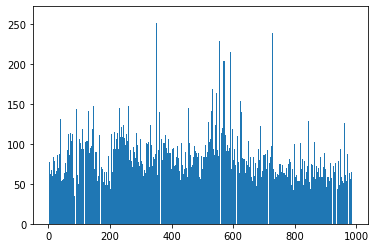

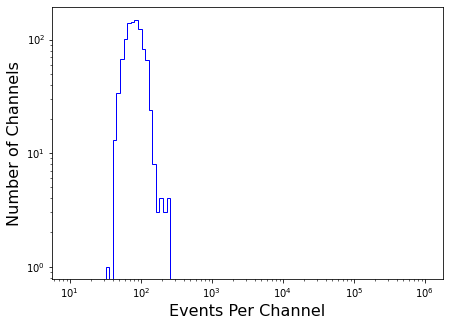

In [159]:
#CAN COMPARE WITH alldata VS not_noisydata

array=plt.hist(not_noisydata['Channel'].values, np.linspace(0,989,990) )#np.linspace function is hlepful for generating bins
distri=np.copy(array[0]) #make a copy so if I write over array I don't have probelms
plt.figure(figsize=(7,5)) # lets you make a custom size for your plot
plt.hist(distri, np.logspace(1,6,100),color='b', histtype='step' )
plt.xlabel('Events Per Channel',fontsize=16)
plt.ylabel('Number of Channels',fontsize=16)
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")

In [160]:

def get_clusterdata(df, e_thresh, t_thresh):
    sorted_df = df.copy()
    sorted_df['MaxTime'] =  df[['Time', 'MaxPosInWindow']].sum(axis=1)
    sorted_df = sorted_df.sort_values(by=['MaxTime'])
    sorted_df = sorted_df.reset_index(drop=True)
    
    new_df = sorted_df.copy()
    
    #print(new_df[50:70])
        
    new_df['Cluster'] = [-1]*len(new_df)
        
    #get events that are clustered
    row = 0
    events = 1
    cluster = [row]
    cluster_num = 0
    
    while (row < len(df)):
        
        #make sure there is a next event. if at end of dataframe, set times to fail next test
        if(row < len(df) - 1):
            successive_time = sorted_df.iloc[row + 1]['MaxTime'] #+ sorted_df.iloc[row + 1]['MaxPosInWindow']/1000.0
            event_time = sorted_df.iloc[row]['MaxTime'] #+ sorted_df.iloc[row]['MaxPosInWindow']/1000.0
        else:
            event_time = 0
            successive_time = t_thresh + 1
            
            
        if abs(successive_time - event_time) <= t_thresh:
            events += 1
            cluster.append(row + 1)
        else:   
                
            #print(events)
            if events < e_thresh:
                for i in cluster:
                    new_df = new_df.drop(i) #sorted_df.index[i])
            else:
                #clusters.append(cluster)
                for i in cluster:
                    #print(cluster_num)
                    new_df.loc[i, 'Cluster'] = cluster_num
                cluster_num += 1
            
            events = 1
            cluster = [row + 1]
            
        row += 1
        
    return new_df


In [161]:
#helper functions
#NOW REDUNDANT


def get_eventspercluster(df):
    return [len(df[df['Cluster'] == i]) for i in range(numofclusters)]


def get_channelspercluster(df):
    
    return [len(df[df['Cluster'] == i]['Channel'].unique()) for i in range(max(df['Cluster']) + 1)]


In [162]:
event_threshold = 5
time_threshold = 1
    
clustereventdata = get_clusterdata(louddata, event_threshold, time_threshold )

numofclusters = max(clustereventdata['Cluster']) + 1

average_eventspercluster = len(clustereventdata) / numofclusters

average_channelspercluster = sum(get_channelspercluster(clustereventdata)) / numofclusters


print("Num of clusters: " + str(numofclusters))

print("Average events per cluster: " + str(average_eventspercluster))
      
print("Average channels per cluster: " + str(average_channelspercluster))

clustereventdata

Num of clusters: 283
Average events per cluster: 12.141342756183745
Average channels per cluster: 9.045936395759718


,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,MaxTime,Cluster
4,350259,390,7191.136,1,3.153082,3.209,32220.179353,-4443.554698,14054.428874,39555.582157,7194.345,0
5,350259,376,7191.152,1,3.175950,3.328,23609.900146,-6020.468653,15639.674128,27810.157738,7194.480,0
6,350259,375,7191.128,1,3.152633,3.644,13416.816543,-2980.049871,12601.258062,11433.233803,7194.772,0
7,350259,27,7191.136,1,3.175879,3.637,23567.885857,-4515.251541,14154.884720,29155.087318,7194.773,0
8,350259,28,7191.152,1,3.200379,3.687,25765.831235,-5549.806880,15168.531703,29658.848249,7194.839,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4531,350292,222,2747003.208,1,3.147254,3.121,30579.904199,-4333.927302,13419.368891,37216.336106,2747006.329,282
4532,350292,355,2747003.224,1,3.152207,3.451,30272.727801,-2029.011388,11679.058690,38528.572910,2747006.675,282
4533,350292,236,2747003.224,1,3.172547,3.519,24257.942819,-4189.239629,13810.768255,30323.310805,2747006.743,282
4534,350292,302,2747003.224,1,3.169739,3.527,24015.788725,-2364.712636,11974.064748,29491.910150,2747006.751,282


In [163]:
#show = clustereventdata.head(50)
#show

In [164]:
# create dictionary mapping channel numbers to a tuple containing coordinates (x,y,z)

def load_coords():
    
    coords = {}
    
    with open("./data/detector_positions.txt", 'r') as f:
        for line in f:
            data = line.split(',')
            
            if int(data[0]) < 1000:
                coords[int(data[0])] = (float(data[1]), float(data[2]), float(data[3]))
        
    return coords

# returns array of 3 arrays corresponding to x y z
def get_clustercoords(df):
    
    ch_coords = load_coords()
    
    
    #coords = []
    x = []
    y = []
    z = []
    
    
    for c in df['Channel']:
        #coords.append([ch_coords[c][0], ch_coords[c][1], ch_coords[c][2]])
        x.append(ch_coords[c][0])
        y.append(ch_coords[c][1])
        z.append(ch_coords[c][2])
    
    return [x,y,z]
    #return coords


# get first cluster
#cluster = clustereventdata[clustereventdata['Cluster'] == 13]

#cluster

#cluster_coords = get_clustercoords(cluster)
#print(cluster_coords)

In [165]:
# I HAVE NO IDEA HOW THIS WORKS I COPIED IT FROM HERE:
# https://stackoverflow.com/questions/2298390/fitting-a-line-in-3d


# takes dataframe of a single cluster and finds line of best fit
def get_fitline(cluster):
    coords = get_clustercoords(cluster)
    
    data  = np.array(coords).T

    datamean = data.mean(axis=0)

    # Do an SVD on the mean-centered data.
    uu, dd, vv = np.linalg.svd(data - datamean)

    # Now vv[0] contains the first principal component, i.e. the direction
    # vector of the 'best fit' line in the least squares sense.

    # Now generate some points along this best fit line, for plotting.

    # I use -7, 7 since the spread of the data is roughly 14
    # and we want it to have mean 0 (like the points we did
    # the svd on). Also, it's a straight line, so we only need 2 points.
    linepts = vv[0] * np.mgrid[-400:400:2j][:, np.newaxis]

    # shift by the mean to get the line in the right place
    linepts += datamean
    
    return linepts

#linepoints = BlackBox(cluster)

#print(linepoints)

In [166]:
import math

def get_cluster_NRMSE(cluster):

    ''' gets NRMSE for a given cluster
        use distance from point to line of best fit as residual where
        d = |(p-a)x(p-b)|/|b-a|
        and variables are vectors
    '''

    # get dictionary of all channels coords
    channel_coords = load_coords()
    
    dlist = []

    # store 2 best fit lines as vectors
    a = get_fitline(cluster)[0]
    b = get_fitline(cluster)[1]

    for index, event in cluster.iterrows():
        

        p = np.array(channel_coords[event['Channel']])
        d = np.linalg.norm(np.cross(p-a, p-b)) / np.linalg.norm(b-a)
        
        dlist.append(d)
        
    # get root mean squared error for cluster
    RMSE = math.sqrt(sum([i**2 for i in dlist])/(2* len(dlist) - 5))

    # normalize
    NRMSE = RMSE / 4.54**2
    
    return NRMSE

#cluster = clustereventdata[clustereventdata['Cluster'] == 16]
#print(get_cluster_NRMSE(cluster))

In [167]:
def get_cluster_zenith(cluster):
    linepoints = get_fitline(cluster)
    
    z = abs(linepoints[0][2] - linepoints[1][2])
    d = abs(np.linalg.norm(linepoints[0] - linepoints[1]))
    return math.acos(z/d)
    
#get_cluster_zenith(cluster)

In [168]:
def make_clusterDF(df):
    # get clusters
    clusters = np.unique(df['Cluster'])
    numofclusters = len(clusters)
    
    eventspercluster = []
    channelspercluster = []    
    starttimes = []
    timespreads = []
    NRMSE = []
    zeniths = []
        
    for c in range(numofclusters):
        
        cluster = df[df['Cluster'] == c]
     
        #event and channel info
        eventspercluster.append(len(cluster))
        channelspercluster.append(len(cluster['Channel'].unique()))
   
        #get timespread
        clustertimes = cluster['MaxTime']
        starttimes.append(min(clustertimes))
        timespreads.append(max(clustertimes) - min(clustertimes))
        
        #get NRMSE
        NRMSE.append(get_cluster_NRMSE(cluster))

        #get angles
        zeniths.append(get_cluster_zenith(cluster))
    
    zeniths_degrees = [theta*360/(2*math.pi) for theta in zeniths]
    cos_theta = [math.cos(theta) for theta in zeniths]
    
    d = {'Cluster' : clusters, 'Events' : eventspercluster, 'Channels' : channelspercluster, \
        'StartTime': starttimes, 'TimeSpread' : timespreads, 'NRMSE' : NRMSE, \
         'Zenith' : zeniths, 'Zenith(deg)' : zeniths_degrees, 'Cosine' : cos_theta}
    
    newdf = pd.DataFrame(data=d)
    
    return newdf

clusterdata = make_clusterDF(clustereventdata)

clusterdata

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Zenith(deg),Cosine
0,0,5,5,7194.345,0.494,6.430681e-01,0.405188,23.215552,9.190284e-01
1,1,5,5,37039.429,0.846,9.846884e-01,0.743109,42.577029,7.363684e-01
2,2,9,9,42897.221,0.832,8.721734e-01,0.770941,44.171647,7.172555e-01
3,3,5,5,62388.310,0.590,7.641546e-01,0.770401,44.140701,7.176318e-01
4,4,5,5,73675.640,0.778,6.606253e-01,0.426780,24.452714,9.103032e-01
...,...,...,...,...,...,...,...,...,...
278,278,5,3,2710760.519,0.903,1.394024e+00,0.632087,36.215925,8.067961e-01
279,279,5,2,2710763.342,0.089,3.082467e-15,1.570796,90.000000,6.123234e-17
280,280,7,7,2728511.764,0.730,6.761452e-01,0.564814,32.361453,8.446882e-01
281,281,7,7,2739741.710,0.575,1.130782e+00,0.647712,37.111177,7.974662e-01


In [169]:
filterdata = clusterdata[clusterdata['NRMSE'] < 1.5]
filterdata = filterdata[filterdata['Channels'] >= 5]

len(filterdata)

223

In [170]:
# For graph

#clusterlist = [clustereventdata[clustereventdata['Cluster'] == i] for i in range(numofclusters)]

#selectedclusterdata = timeclusterdata[timeclusterdata['NRMSE'] < 2]
clusters = np.unique(filterdata['Cluster'].values)
clusterlist = [clustereventdata[clustereventdata['Cluster'] == i] for i in clusters]

print(len(clusterlist))

listofcoords = [get_clustercoords(cluster) for cluster in clusterlist]
lines = [get_fitline(cluster) for cluster in clusterlist]

#listofcoords[13]

223


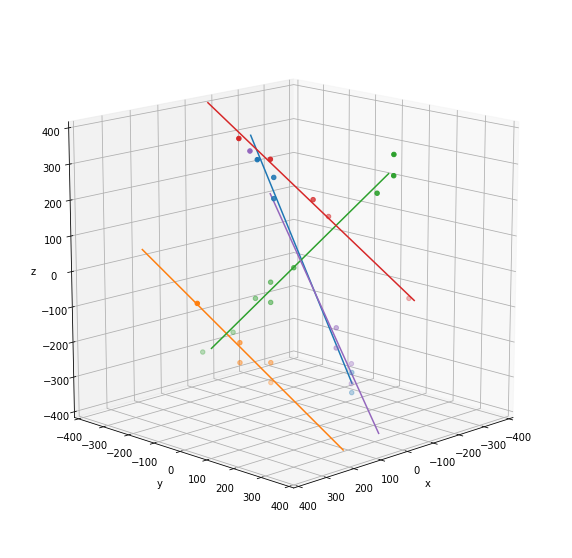

In [171]:
# AGAIN NOT MY CODE

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

for i in range(0,5):
    ax.scatter3D(*listofcoords[i])
    ax.plot3D(*lines[i].T)

plt.xlim([-400,400])
plt.ylim([-400,400])
ax.set_zlim([-400,400])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(15, 45)

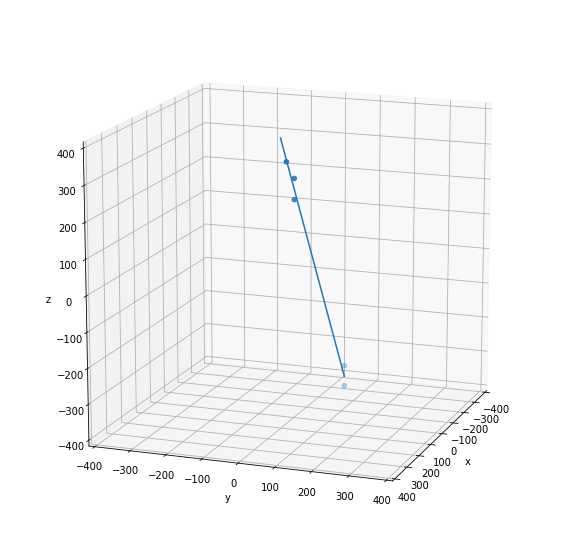

In [172]:
import time

for i in range(0, 1):
    plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    
    ax.scatter3D(*listofcoords[i])
    ax.plot3D(*lines[i].T)


    plt.xlim([-400,400])
    plt.ylim([-400,400])
    ax.set_zlim([-400,400])

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.view_init(15, 20)
    
    plt.show()

In [173]:
# VARIABLE PARAMETERS
time_thresholds = [.1, .5, 1, 2]

var_timedata = [get_channelspercluster(get_clusterdata(louddata, 5, t)) for t in time_thresholds]

In [188]:
print(sum(var_timedata[0]))
print(sum(var_timedata[1]))
print(sum(var_timedata[2]))
print(sum(var_timedata[3]))
var_timedata[0]

1181
2485
2560
2563


[5,
 5,
 4,
 4,
 4,
 3,
 4,
 3,
 2,
 2,
 2,
 3,
 6,
 2,
 2,
 5,
 6,
 5,
 6,
 41,
 6,
 7,
 6,
 5,
 3,
 4,
 6,
 6,
 16,
 4,
 48,
 5,
 5,
 7,
 14,
 13,
 12,
 26,
 4,
 19,
 7,
 5,
 3,
 6,
 4,
 4,
 2,
 5,
 9,
 6,
 9,
 6,
 4,
 6,
 5,
 6,
 5,
 3,
 3,
 2,
 2,
 3,
 11,
 6,
 6,
 5,
 5,
 5,
 6,
 9,
 6,
 6,
 5,
 2,
 8,
 44,
 5,
 5,
 5,
 6,
 6,
 3,
 2,
 3,
 6,
 5,
 5,
 6,
 5,
 6,
 5,
 59,
 6,
 6,
 4,
 4,
 3,
 3,
 1,
 3,
 2,
 6,
 5,
 13,
 20,
 6,
 5,
 6,
 5,
 14,
 5,
 5,
 5,
 7,
 5,
 6,
 4,
 5,
 7,
 8,
 9,
 3,
 6,
 8,
 5,
 4,
 6,
 5,
 5,
 6,
 5,
 7,
 5,
 10,
 3,
 5,
 11,
 6,
 18,
 5,
 5,
 6,
 5,
 7,
 5,
 88,
 5,
 16,
 3,
 6,
 5,
 2,
 6,
 12,
 6,
 4,
 2,
 6]

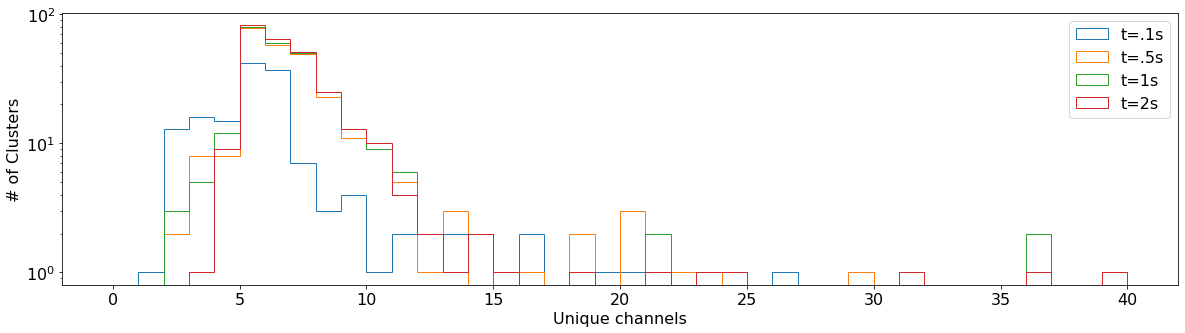

In [175]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Unique channels',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

array=plt.hist(var_timedata[0], np.linspace(0,40,41), histtype='step', label='t=.1s')
array=plt.hist(var_timedata[1], np.linspace(0,40,41), histtype='step', label='t=.5s')
array=plt.hist(var_timedata[2], np.linspace(0,40,41), histtype='step', label='t=1s')
array=plt.hist(var_timedata[3], np.linspace(0,40,41), histtype='step', label='t=2s')


plt.legend(fontsize=16)
plt.gca().set_yscale("log")

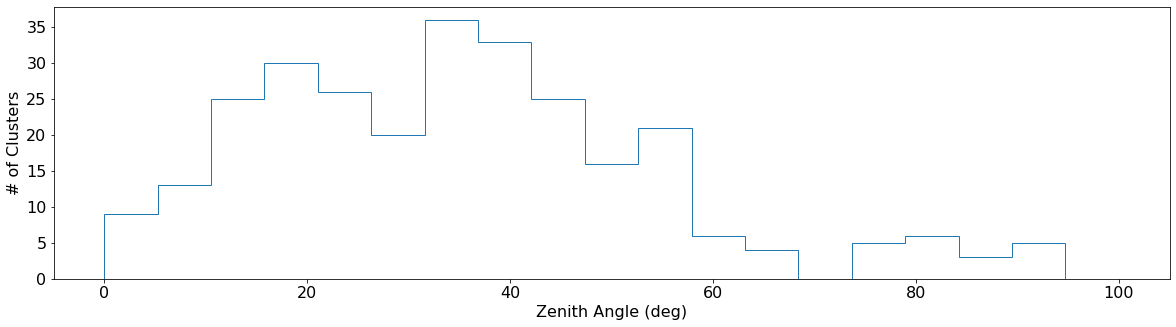

In [176]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Zenith Angle (deg)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,20), histtype='step')

#plt.gca().set_yscale("log")

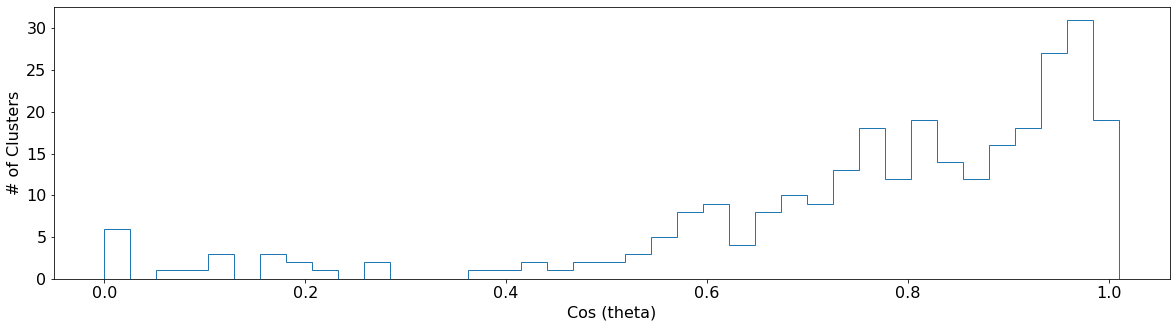

In [177]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos (theta)',fontsize=16)


#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array = plt.hist(clusterdata['Cosine'], np.linspace(0,1.01,40), histtype='step')

#plt.gca().set_yscale("log")

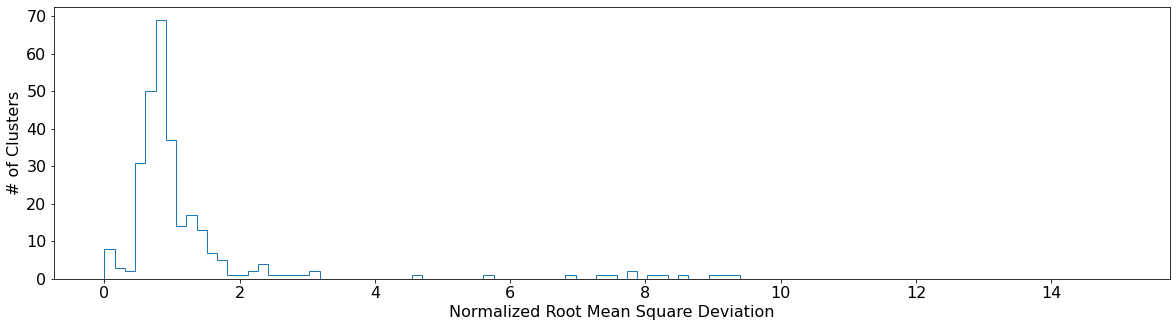

In [178]:

plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Normalized Root Mean Square Deviation',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,180,181), histtype='step')
array=plt.hist(clusterdata['NRMSE'], np.linspace(0,15,100), histtype='step')
#plt.gca().set_yscale("log")

NameError: name 'listof_numofevents' is not defined

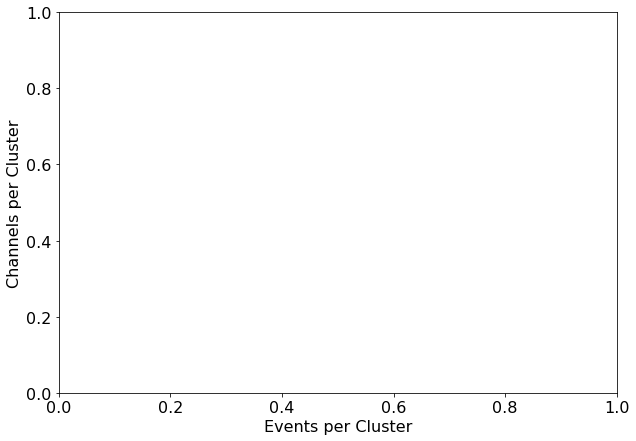

In [179]:
#Scatter plot:

plt.figure(figsize=(10,7)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
#plt.title('First 3 Towers of ds3564',fontsize=16)
plt.xlabel('Events per Cluster',fontsize=16)
plt.ylabel('Channels per Cluster',fontsize=16)

plt.scatter(listof_numofevents,listof_uniquechannels, marker='.',s=100)
#plt.gca().set_yscale("log") #set y-scale to be logarithmic (x-scale works the same way)
plt.ylim([0,30])
plt.xlim([0,30])


In [ ]:
#plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.ylabel('Number of Events',fontsize=16)
plt.xlabel('Cluster #',fontsize=16)
array=plt.hist(clustereventdata['Cluster'], np.linspace(0,100,101), histtype='step')
#plt.gca().set_yscale("log")

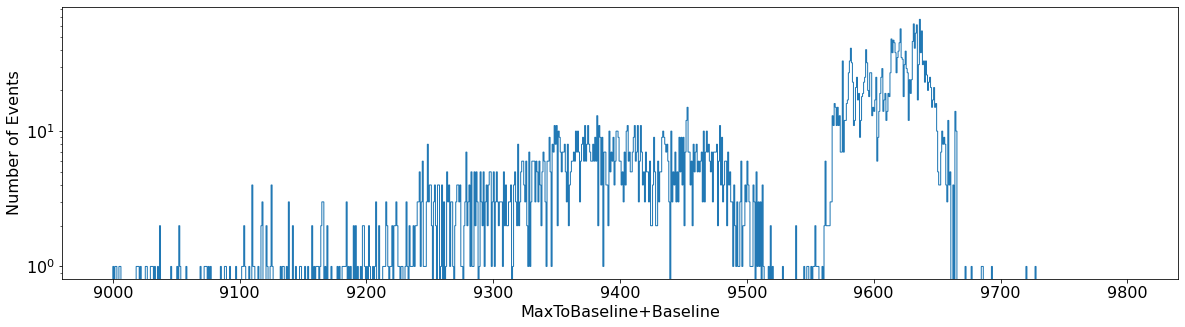

In [182]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.ylabel('Number of Events',fontsize=16)
plt.xlabel('MaxToBaseline+Baseline',fontsize=16)
array=plt.hist(not_noisydata['MaxToBaseline'].values+not_noisydata['Baseline'].values, np.linspace(9000,9800,1001), histtype='step')
plt.gca().set_yscale("log")

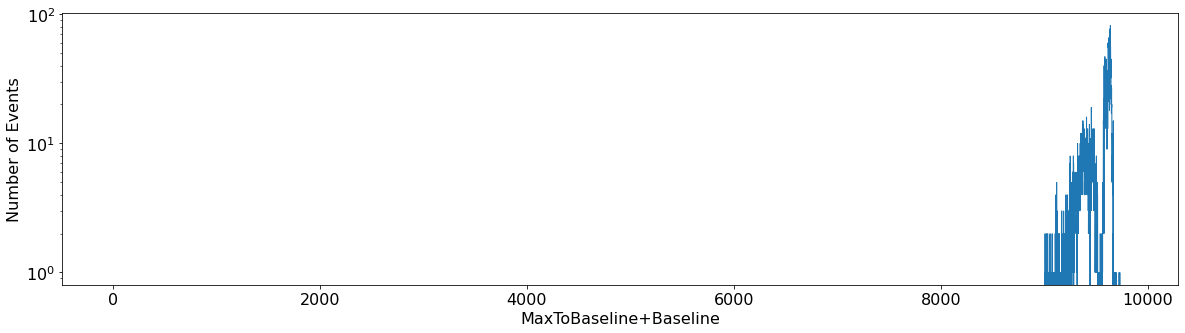

In [181]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.ylabel('Number of Events',fontsize=16)
plt.xlabel('MaxToBaseline+Baseline',fontsize=16)
array=plt.hist(louddata['MaxToBaseline'].values+louddata['Baseline'].values, np.linspace(0,9800,9801), histtype='step')
plt.gca().set_yscale("log")

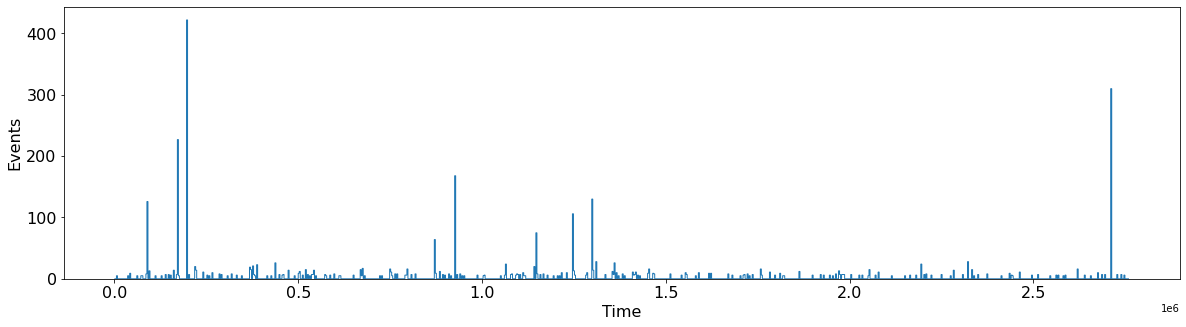

In [184]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.ylabel('Events',fontsize=16)
plt.xlabel('Time',fontsize=16)
array=plt.hist(clustereventdata['Time'].values, np.linspace(0,2760000,1000), histtype='step')
#plt.gca().set_yscale("log")